<a href="https://colab.research.google.com/github/waqqasansari/Machine_Learning_Probs/blob/master/hackerearth_novarits_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data = pd.read_csv('Train.csv')
test_data = pd.read_csv('Test.csv')

print("The shape of training data is ->>", train_data.shape)
print("The shape of training data is ->>", test_data.shape)

The shape of training data is ->> (23856, 18)
The shape of training data is ->> (15903, 17)


In [3]:
print(train_data.head(5))
print(test_data.head(5))

  INCIDENT_ID       DATE  X_1  X_2  ...  X_13  X_14  X_15  MULTIPLE_OFFENSE
0   CR_102659  04-JUL-04    0   36  ...    92    29    36                 0
1   CR_189752  18-JUL-17    1   37  ...   103   142    34                 1
2   CR_184637  15-MAR-17    0    3  ...   110    93    34                 1
3   CR_139071  13-FEB-09    0   33  ...    72    29    34                 1
4   CR_109335  13-APR-05    0   33  ...   112    29    43                 1

[5 rows x 18 columns]
  INCIDENT_ID       DATE  X_1  X_2  X_3  ...  X_11  X_12  X_13  X_14  X_15
0   CR_195453  01-FEB-18    0   30   35  ...   174   NaN    72   119    23
1   CR_103520  05-MAR-04    0   44   44  ...   316   0.0    12    29    34
2   CR_196089  27-JAN-18    0   34   33  ...   316   1.0    72     0    34
3   CR_112195  18-AUG-06    7    3    2  ...   174   1.0   112    87    34
4   CR_149832  31-OCT-11    0    7    8  ...   174   0.0   112    93    43

[5 rows x 17 columns]


In [4]:
#check for the nan values
print(train_data.isnull().values.any())
print(test_data.isnull().values.any())

True
True


In [5]:
print(train_data.mean())
print(test_data.mean())

X_1                   0.483778
X_2                  24.791206
X_3                  24.637450
X_4                   4.276744
X_5                   2.455609
X_6                   6.154175
X_7                   4.876509
X_8                   0.972460
X_9                   4.924128
X_10                  1.244802
X_11                206.954519
X_12                  0.974064
X_13                 85.237383
X_14                 72.674296
X_15                 33.464747
MULTIPLE_OFFENSE      0.955231
dtype: float64
X_1       0.468088
X_2      24.722631
X_3      24.575049
X_4       4.284223
X_5       2.448469
X_6       6.084890
X_7       4.862605
X_8       0.986732
X_9       4.908759
X_10      1.241212
X_11    206.954097
X_12      0.972236
X_13     85.191096
X_14     72.218575
X_15     33.422625
dtype: float64


In [6]:
train_data = train_data.fillna(train_data.mean())
test_data = test_data.fillna(test_data.mean())

In [7]:
#again check whether Nan value is present or not
print(train_data.isnull().values.any())
print(test_data.isnull().values.any())

False
False


##EDA

In [8]:
off0 = train_data.loc[train_data['MULTIPLE_OFFENSE'] == 0]
off1 = train_data.loc[train_data['MULTIPLE_OFFENSE'] == 1]

print(off0)
print(off1)

      INCIDENT_ID       DATE  X_1  X_2  ...  X_13  X_14  X_15  MULTIPLE_OFFENSE
0       CR_102659  04-JUL-04    0   36  ...    92    29    36                 0
9        CR_32634  25-AUG-96    1    4  ...   103    29    34                 0
44       CR_31819  07-OCT-95    0   48  ...   103    62    34                 0
47      CR_156814  21-JUL-12    0   21  ...   103    80    34                 0
136      CR_47976  03-AUG-97    0   43  ...   109   124     9                 0
...           ...        ...  ...  ...  ...   ...   ...   ...               ...
23732    CR_42135  18-FEB-97    1    4  ...   103   119    34                 0
23805    CR_31988  24-OCT-95    0   49  ...    72    93    39                 0
23806   CR_123790  24-APR-07    0   30  ...   103    29    34                 0
23823    CR_63961  13-DEC-99    1   47  ...    67     6     9                 0
23825    CR_33573  25-FEB-96    0    4  ...    92    29    34                 0

[1068 rows x 18 columns]
      INCIDENT

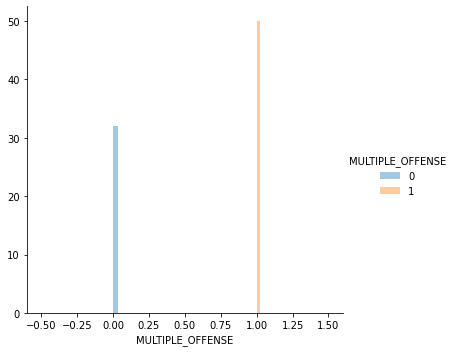

In [9]:
sns.FacetGrid(train_data, hue="MULTIPLE_OFFENSE", height=5) \
   .map(sns.distplot, "MULTIPLE_OFFENSE") \
   .add_legend()
plt.show()

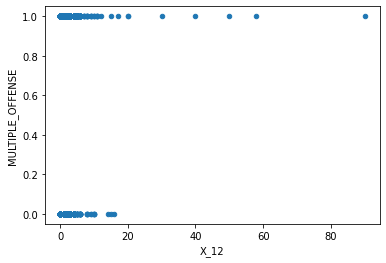

In [10]:
train_data.plot(kind="scatter", x='X_12', y='MULTIPLE_OFFENSE')

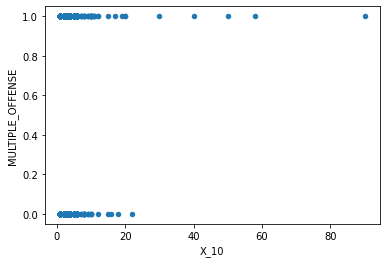

In [11]:
train_data.plot(kind="scatter", x='X_10', y='MULTIPLE_OFFENSE')

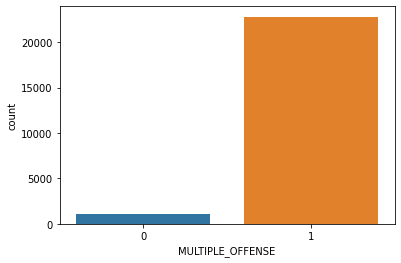

In [13]:
sns.countplot(x="MULTIPLE_OFFENSE", data=train_data)

##data is highly unbalanced

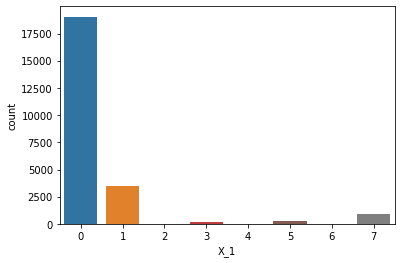

In [14]:
sns.countplot(x="X_1", data=train_data)

In [15]:
train_data.drop(['INCIDENT_ID','DATE'],axis=1,inplace=True)
test_data.drop(['INCIDENT_ID','DATE'],axis=1,inplace=True)

In [16]:
print(train_data.head(4))
print(test_data.head(4))

   X_1  X_2  X_3  X_4  X_5  X_6  ...  X_11  X_12  X_13  X_14  X_15  MULTIPLE_OFFENSE
0    0   36   34    2    1    5  ...   174   1.0    92    29    36                 0
1    1   37   37    0    0   11  ...   236   1.0   103   142    34                 1
2    0    3    2    3    5    1  ...   174   1.0   110    93    34                 1
3    0   33   32    2    1    7  ...   249   1.0    72    29    34                 1

[4 rows x 16 columns]
   X_1  X_2  X_3  X_4  X_5  X_6  ...  X_10  X_11      X_12  X_13  X_14  X_15
0    0   30   35    7    3    6  ...     1   174  0.972236    72   119    23
1    0   44   44    1    3    7  ...     1   316  0.000000    12    29    34
2    0   34   33    3    5    2  ...     1   316  1.000000    72     0    34
3    7    3    2    3    5    9  ...     1   174  1.000000   112    87    34

[4 rows x 15 columns]


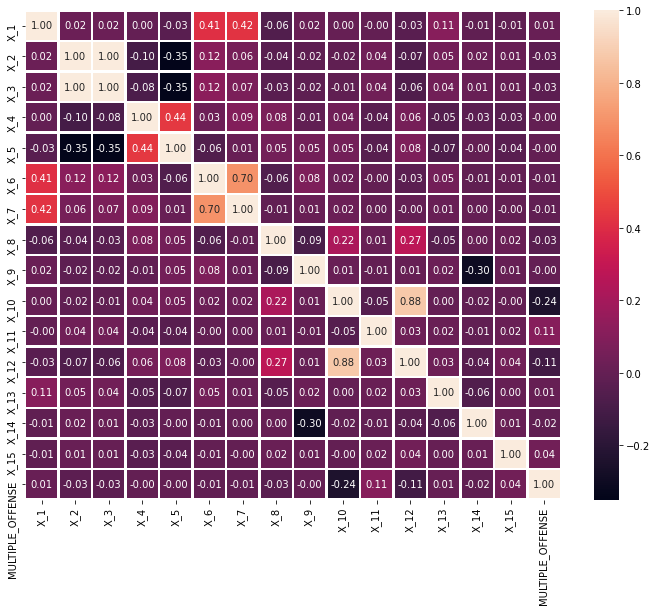

In [18]:
corr = train_data.corr()

f,ax = plt.subplots(figsize=(12,9))
sns.heatmap(corr, annot = True, linewidths=1.5 , fmt = '.2f',ax=ax)
plt.show()

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


scaler.fit(train_data.drop('MULTIPLE_OFFENSE',axis=1))
scaled_features = scaler.transform(train_data.drop('MULTIPLE_OFFENSE',axis=1))
X_train_sc = pd.DataFrame(scaled_features, columns=train_data.columns[:-1])

scaled_features = scaler.transform(test_data)
test_sc = pd.DataFrame(scaled_features, columns = test_data.columns)

In [ ]:
train_data

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_data.drop('MULTIPLE_OFFENSE',axis=1), train_data['MULTIPLE_OFFENSE'], test_size=0.30, random_state=101)
X_train_sc, X_test_sc, y_train_sc, y_test_sc = train_test_split(X_train_sc, train_data['MULTIPLE_OFFENSE'], test_size=0.30, random_state=101)

In [24]:
clf = xgb.XGBClassifier(learning_rate=0.1, max_depth = len(train_data['MULTIPLE_OFFENSE']))

clf.fit(X_train, y_train)
pred_xgbc = clf.predict(X_test)
print(confusion_matrix(y_test, pred_xgbc))
print(classification_report(y_test, pred_xgbc))
print(accuracy_score(y_test, pred_xgbc))

[[ 311   11]
 [   3 6832]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       322
           1       1.00      1.00      1.00      6835

    accuracy                           1.00      7157
   macro avg       0.99      0.98      0.99      7157
weighted avg       1.00      1.00      1.00      7157

0.9980438731312002


In [27]:
clf = xgb.XGBClassifier(learning_rate=0.53, max_depth = len(train_data['MULTIPLE_OFFENSE']))

clf.fit(X_train_sc, y_train_sc)
pred_xgbc = clf.predict(X_test_sc)
print(confusion_matrix(y_test, pred_xgbc))
print(classification_report(y_test_sc, pred_xgbc))
print(accuracy_score(y_test_sc, pred_xgbc))

[[ 316    6]
 [   3 6832]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       322
           1       1.00      1.00      1.00      6835

    accuracy                           1.00      7157
   macro avg       0.99      0.99      0.99      7157
weighted avg       1.00      1.00      1.00      7157

0.9987424898700573


In [33]:
test_data

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,0,30,35,7,3,6,4,0,5,1,174,0.972236,72,119,23
1,0,44,44,1,3,7,1,4,6,1,316,0.000000,12,29,34
2,0,34,33,3,5,2,7,3,0,1,316,1.000000,72,0,34
3,7,3,2,3,5,9,8,0,5,1,174,1.000000,112,87,34
4,0,7,8,7,3,2,7,1,5,1,174,0.000000,112,93,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15898,1,22,22,7,3,15,10,0,5,1,174,0.000000,72,29,43
15899,0,35,30,3,5,1,0,2,3,2,0,2.000000,72,93,34
15900,0,26,27,9,0,6,4,2,6,1,0,1.000000,72,62,34
15901,0,21,23,4,1,2,7,1,6,2,249,2.000000,92,62,34


In [34]:
predict_on = test_data[['X_1',	'X_2',	'X_3',	'X_4',	'X_5',	'X_6',	'X_7',	'X_8',	'X_9',	'X_10',	'X_11',	'X_12',	'X_13',	'X_14',	'X_15']]

In [35]:
z = clf.predict(predict_on)

In [36]:
submit = pd.DataFrame(columns=['INCIDENT_ID', 'MULTIPLE_OFFENSE'])
submit.head()

,INCIDENT_ID,MULTIPLE_OFFENSE


In [37]:
df_test = pd.read_csv('Test.csv')

In [39]:
submit['INCIDENT_ID'] = df_test['INCIDENT_ID']
submit.head()

,INCIDENT_ID,MULTIPLE_OFFENSE
0,CR_195453,NaN
1,CR_103520,NaN
2,CR_196089,NaN
3,CR_112195,NaN
4,CR_149832,NaN


In [40]:
submit['MULTIPLE_OFFENSE'] = z
submit.head()

,INCIDENT_ID,MULTIPLE_OFFENSE
0,CR_195453,1
1,CR_103520,0
2,CR_196089,1
3,CR_112195,1
4,CR_149832,0


In [41]:
submit.to_csv('submission(waqqas).csv', index=False)

In [42]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train,y_train)
pred_gnb = gnb.predict(X_test)
print(confusion_matrix(y_test, pred_gnb))
print(classification_report(y_test, pred_gnb))
print(accuracy_score(y_test, pred_gnb))

[[  61  261]
 [ 114 6721]]
              precision    recall  f1-score   support

           0       0.35      0.19      0.25       322
           1       0.96      0.98      0.97      6835

    accuracy                           0.95      7157
   macro avg       0.66      0.59      0.61      7157
weighted avg       0.93      0.95      0.94      7157

0.9476037445857203


In [43]:
n = clf.predict(predict_on)

In [46]:
submit = pd.DataFrame(columns=['INCIDENT_ID', 'MULTIPLE_OFFENSE'])
submit.head()

submit['INCIDENT_ID'] = df_test['INCIDENT_ID']
submit.head()

submit['MULTIPLE_OFFENSE'] = z
print(submit.head())

submit.to_csv('submission(NB).csv', index=False)

  INCIDENT_ID  MULTIPLE_OFFENSE
0   CR_195453                 1
1   CR_103520                 0
2   CR_196089                 1
3   CR_112195                 1
4   CR_149832                 0


In [47]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=6, max_features=7)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features=7,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [48]:
pred_rfc = rfc.predict(X_test)
print(confusion_matrix(y_test, pred_rfc))
print(classification_report(y_test, pred_rfc))
print(accuracy_score(y_test, pred_rfc))

[[ 243   79]
 [   6 6829]]
              precision    recall  f1-score   support

           0       0.98      0.75      0.85       322
           1       0.99      1.00      0.99      6835

    accuracy                           0.99      7157
   macro avg       0.98      0.88      0.92      7157
weighted avg       0.99      0.99      0.99      7157

0.9881235154394299


In [50]:
submit = pd.DataFrame(columns=['INCIDENT_ID', 'MULTIPLE_OFFENSE'])
submit.head()

submit['INCIDENT_ID'] = df_test['INCIDENT_ID']
submit.head()

submit['MULTIPLE_OFFENSE'] = z
print(submit.head(10))

submit.to_csv('submission(RF).csv', index=False)

  INCIDENT_ID  MULTIPLE_OFFENSE
0   CR_195453                 1
1   CR_103520                 0
2   CR_196089                 1
3   CR_112195                 1
4   CR_149832                 0
5    CR_81654                 0
6   CR_139009                 0
7     CR_6108                 1
8    CR_62283                 0
9     CR_5710                 1
